In [166]:
# 한글문제 해결
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
raw_data=pd.read_excel("../data/titanic.xls")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


# 변수설명  
Survived - 생존 여부 (0 = 사망, 1 = 생존)  
Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)  
Sex - 성별  
Age - 나이  
SibSp - 함께 탑승한 자녀 / 배우자 의 수  
Parch - 함께 탑승한 부모님 / 아이들 의 수  
Ticket - 티켓 번호  
Fare - 탑승 요금  
Cabin - 수하물 번호  
Embarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [122]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [123]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


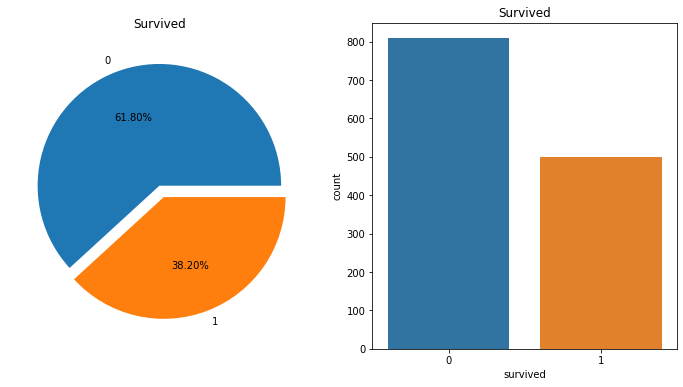

In [124]:
f,ax=plt.subplots(1,2,figsize=(12,6))
raw_data["survived"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.2f%%",ax=ax[0])
ax[0].set_title("Survived")
ax[0].set_ylabel("")

sns.countplot("survived",data=raw_data,ax=ax[1])
ax[1].set_title("Survived")
plt.show()

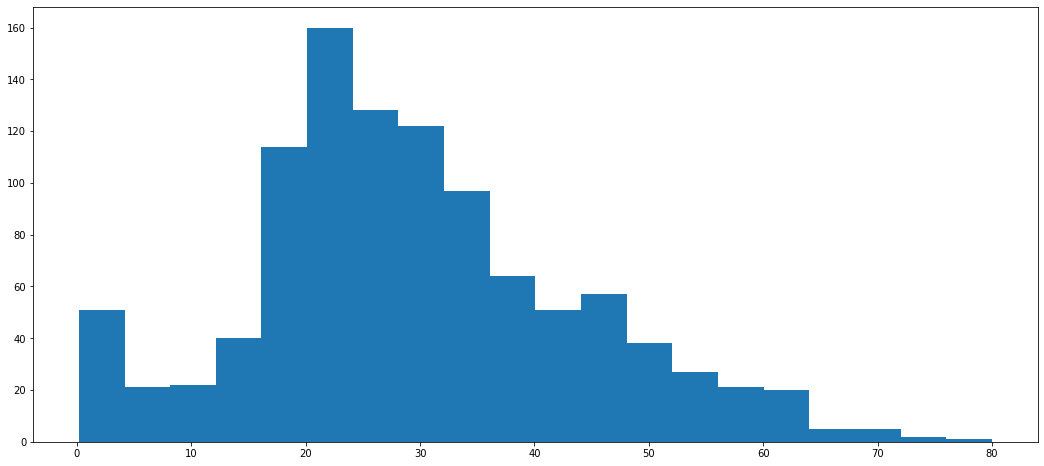

In [125]:
raw_data["age"].hist(bins=20,figsize=(18,8),grid=False)

In [126]:
raw_data.groupby("pclass").mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [127]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


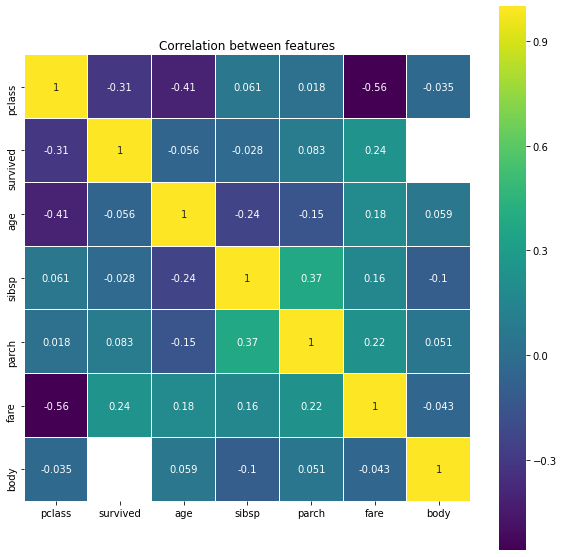

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(),linewidths=0.01,square=True,
           annot=True,cmap=plt.cm.viridis,linecolor="white")
plt.title("Correlation between features")
plt.show()

# 나이별 구별 및 성별 생존률 확인하기

In [129]:
raw_data["age_cat"]=pd.cut(raw_data["age"],bins=[0,3,7,15,30,60,100],
                          include_lowest=True,
                          labels=["baby","children","teenage","young","adult","old"])
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [130]:
raw_data.groupby("age_cat").mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


C:\Users\A\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


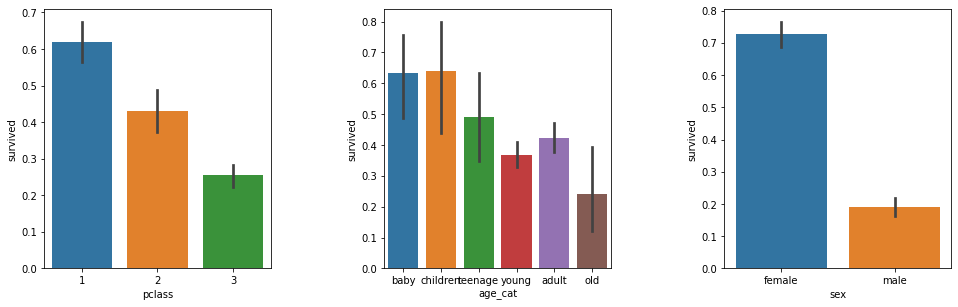

In [131]:
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot("pclass","survived",data=raw_data)
plt.subplot(132)
sns.barplot("age_cat","survived",data=raw_data)
plt.subplot(133)
sns.barplot("sex","survived",data=raw_data)
plt.subplots_adjust(top=1,bottom=0.1,left=0.10,right=1,hspace=0.5,wspace=0.5)
plt.show()

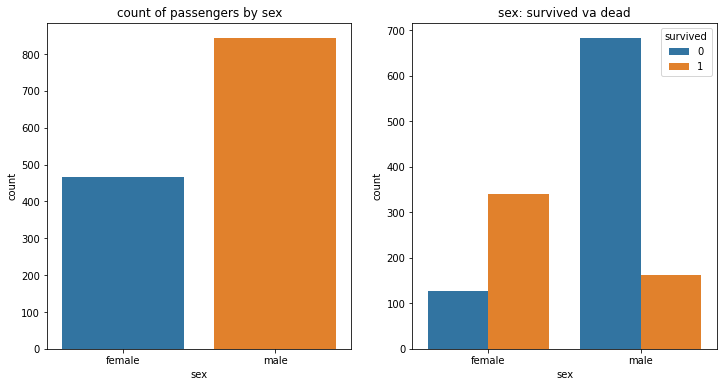

In [132]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot("sex",data=raw_data,ax=ax[0])
ax[0].set_title("count of passengers by sex")
sns.countplot("sex",hue="survived",data=raw_data,ax=ax[1])
ax[1].set_title("sex: survived va dead")
plt.show()

# 보트 탑승 승객의 생존률 확인하기

In [133]:
boat_survivors=raw_data[raw_data["boat"].notnull()]
boat_survivors

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,3,1,"Turja, Miss. Anna Sofia",female,18.0000,0,0,4138,9.8417,NaN,S,15,NaN,NaN,young
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0000,0,0,4134,9.5875,NaN,S,15,NaN,NaN,old
1277,3,1,"Vartanian, Mr. David",male,22.0000,0,0,2658,7.2250,NaN,C,13 15,NaN,NaN,young
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0000,0,0,2688,7.2292,NaN,C,C,NaN,NaN,adult


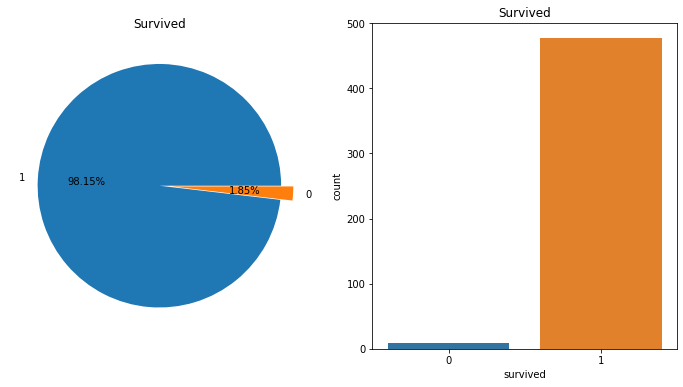

In [134]:
f,ax=plt.subplots(1,2,figsize=(12,6))
boat_survivors["survived"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.2f%%",ax=ax[0])
ax[0].set_title("Survived")
ax[0].set_ylabel("")
sns.countplot("survived",data=boat_survivors,ax=ax[1])
ax[1].set_title("Survived")
plt.show()

# 귀족들의 생존률만 다시 조사하기

In [135]:
raw_data["name"][0]

'Allen, Miss. Elisabeth Walton'

In [136]:
raw_data["name"][0].split(",")[1]

' Miss. Elisabeth Walton'

In [137]:
raw_data["name"][0].split(",")[1].split(".")[0]

' Miss'

In [138]:
test=lambda x: x+2
test(2)

4

In [139]:
list(map(test,range(5)))

[2, 3, 4, 5, 6]

In [140]:
conversion_rare=lambda x:x.split(",")[1].split(".")[0].strip()
raw_data["title"]=raw_data["name"].map(conversion_rare)
title=raw_data["title"].unique()
title 

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [141]:
pd.crosstab(raw_data["title"],raw_data["sex"])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [142]:
raw_data["title"]=raw_data["title"].replace("Mlle","Miss")
raw_data["title"]=raw_data["title"].replace("Ms","Miss")
raw_data["title"]=raw_data["title"].replace("Mme","Mrs")
Rare=["Lady","the Countess","Countess","Capt","Master","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"]
for each in Rare:
    raw_data["title"]=raw_data["title"].replace(each,"Rare")
raw_data["title"].unique()
    

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [143]:
print(raw_data[["title","survived"]].groupby(["title"],as_index=False).mean())

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  Rare  0.466667


In [144]:
raw_data[["title","survived"]].groupby(["title"],as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare,0.466667


# 학습하기 위해 데이터를 정리하고 특징을 선택하기

In [145]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [146]:
tmp=[]
for each in raw_data["sex"]:
    if each =="female":
        tmp.append(0)
    elif each=="male":
        tmp.append(1)
    else:
        tmp.append(np.nan)
        

In [147]:
raw_data["sex"]=tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [148]:
raw_data["survived"]=raw_data["survived"].astype("float")
raw_data["pclass"]=raw_data["pclass"].astype("float")
raw_data["sex"]=raw_data["sex"].astype("float")
raw_data["sibsp"]=raw_data["sibsp"].astype("float")
raw_data["parch"]=raw_data["parch"].astype("float")
raw_data["fare"]=raw_data["fare"].astype("float")
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [149]:
raw_data=raw_data[raw_data["age"].notnull()]
raw_data=raw_data[raw_data["sibsp"].notnull()]
raw_data=raw_data[raw_data["parch"].notnull()]
raw_data=raw_data[raw_data["fare"].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 131.8+ KB


# 생존자 예측을 위한 모델 수립

In [150]:
train_pre=raw_data[["pclass","sex","age","sibsp","parch","fare"]]
train_pre.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [151]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test=train_test_split(train_pre,
                                               raw_data[["survived"]],
                                               test_size=0.1,
                                               random_state=13)

In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    float64
 1   sex     940 non-null    float64
 2   age     940 non-null    float64
 3   sibsp   940 non-null    float64
 4   parch   940 non-null    float64
 5   fare    940 non-null    float64
dtypes: float64(6)
memory usage: 51.4 KB


In [153]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [154]:
X_train=X_train.reset_index()
X_train=X_train.drop(["index"],axis=1)

X_test=X_test.reset_index()
X_test=X_test.drop(["index"],axis=1)

y_train=y_train.reset_index()
y_train=y_train.drop(["index"],axis=1)

y_test=y_test.reset_index()
y_test=y_test.drop(["index"],axis=1)

In [155]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3.0,0.0,37.0,0.0,0.0,7.7500
1,2.0,1.0,34.0,0.0,0.0,13.0000
2,3.0,0.0,38.0,1.0,5.0,31.3875
3,2.0,1.0,31.0,0.0,0.0,13.0000
4,1.0,0.0,63.0,1.0,0.0,221.7792


In [156]:
from sklearn.tree import  DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=3,random_state=13)
tree_clf.fit(X_train,y_train)
print("score: {}".format(tree_clf.score(X_train,y_train)))

score: 0.8117021276595745


In [157]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
               out_file="titanic.dot",
               feature_names=["pclass","sex","age","sibsp","parch","fare"],
               class_names=["Unsurvived","Survived"],
               rounded=True,
               filled=True)


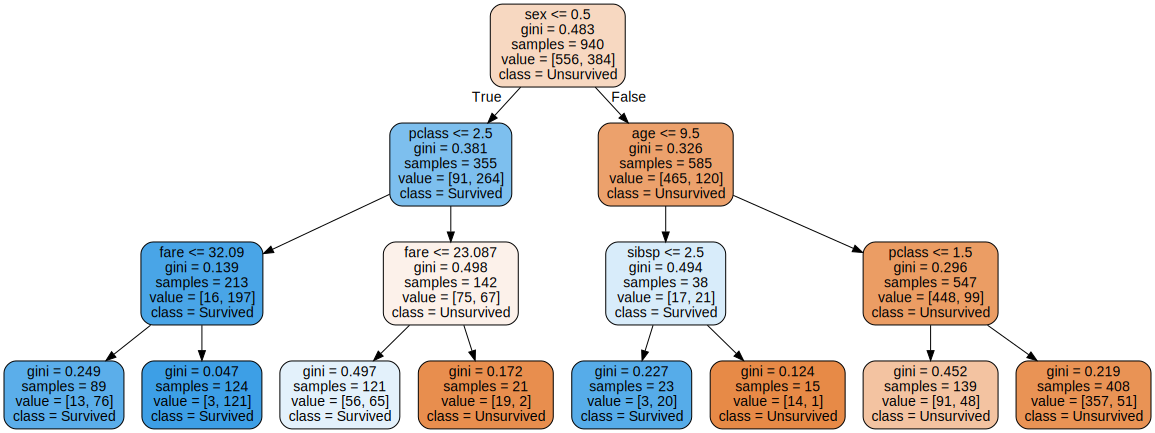

In [158]:
import graphviz
with open("titanic.dot") as f :
    dot_graph=f.read()
dot=graphviz.Source(dot_graph)
dot.format="png"
dot.render(filename="titanic_tree",directory="../images",cleanup=True)
dot

In [159]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print('Test Accuracy is', accuracy_score(y_test, y_pred)*100)

Test Accuracy is 84.76190476190476


# 디카프리오 생존 예측해보기

In [160]:
dicaprio=[3.,1.,19.,0.,0.,5.]
winslet=[1.,0.,17.,1.,1.,100.]

In [161]:
tree_clf.predict_proba([winslet])

array([[0.02419355, 0.97580645]])

In [162]:
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

In [163]:
def isSurvived(name,person):
    isSurvive="not surciced" if tree_clf.predict([person])[0]==0 else "survived"
    print(name," is ",isSurvive,
         "--> ",max(tree_clf.predict_proba([person])[0]))


In [164]:
isSurvived("Dicaprio",dicaprio)
isSurvived("Winslet",winslet)

Dicaprio  is  not surciced -->  0.875
Winslet  is  survived -->  0.9758064516129032


앙상블(ensemble)은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.

다양한 앙상블 기법중에서 랜덤 포레스트(random forest)와 그래티언트 부스팅(gradient boosting)결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용한다.



이 두 모델은 분류와 회귀 문제의 다양한 데이터셋에서 효과적이라고 입증되어있다.

< 랜덤 포레스트 >
결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것이었다.
랜덤 포레스트는 이 문제를 회피할 수 있는 방법이다.

랜덤 포레스트는기본적으로 여러 결정 트리의 묶음이라고 보면 된다.
각 트리는 비교적 예측을 잘 하구 있지만 일부에 과대 적합하다는 경향을 가지고 있음에 기초한다.
서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.

이러한 전략은 구현하기 위해서는 결정 트리를 많이 만들어야 한다.
각각의 트리는 타깃 예측을 잘 해야하고 다른 트리와는 구별되어야 한다.

랜덤 포레스트에서 트리를 랜덤하게 만드는 방법은 두가지가 있다.
1. 데이터를 무작위로 선택하기
2. 분할 테스트에서 특성을 무작위로 선택하기

<랜덤 포레스트 구축>
랜덤 포레스트 모델을 만들기 위해 생성할 트리의 개수를 정해야 한다.(RandomForestRegressor나 RandomForestClassifier의 n_estimators 매개변수).

만약 트리가 10개 필요하다고 해보자.
트리를 만들기 위해 먼저 대이터의 부트스트랩 샘플(bootstrap sample)을 생성한다. 
=> n_samples개의 데이터 포인트 중 무작위로 n_samples 횟수로 반복추축한다.
이 데이터셋은 원래 데이터셋과 크기는 같지만 중복/누락된 데이터 포인트가 있을 수 있다.

그 다음 이 n_samples개의 데이터셋으로 결정 트리를 만든다.
이 부분에서 각 노드에서 전체 특성을 대상으로 하는 것이 아닌, 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다.
몇 개의 특성을 고를지는 max_features 매개변수로 설정한다.

부트스트랩 샘플링은 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어 지도록 한다.
각 노드에서 특성의 일부만 사용하기 때문에 트리의 각 분기는 각기 다른 특성 부분집합을 사용한다.

In [170]:
#반달 데이터셋을 가지고 랜덤 포레스트를 구성해보자.
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

0
AxesSubplot(0.125,0.536818;0.227941x0.343182)
1
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
2
AxesSubplot(0.672059,0.536818;0.227941x0.343182)
3
AxesSubplot(0.125,0.125;0.227941x0.343182)
4
AxesSubplot(0.398529,0.125;0.227941x0.343182)


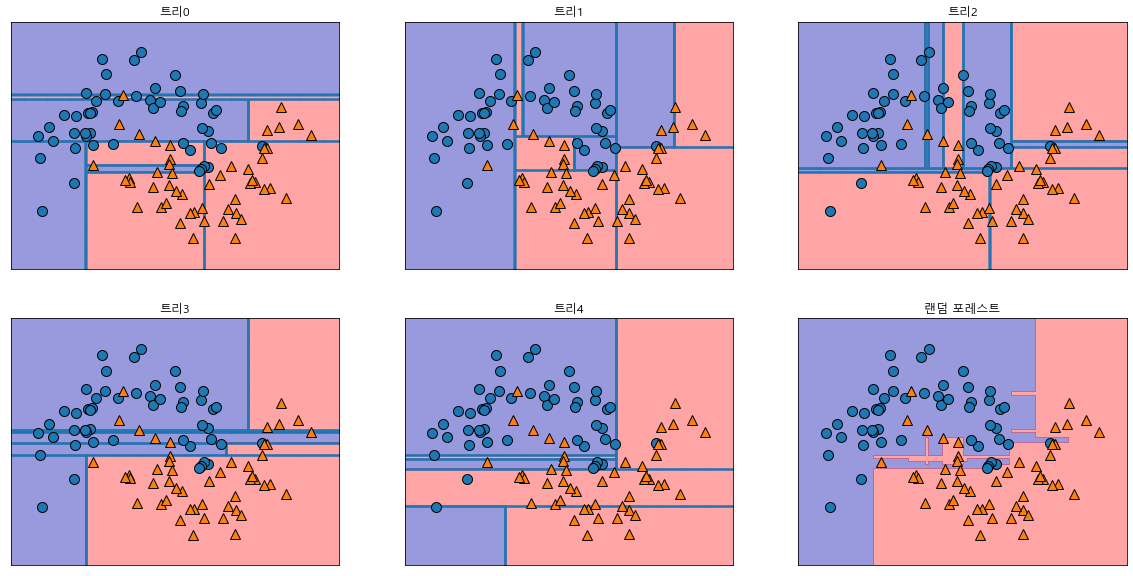

In [184]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    print(i)
    print(ax)
    ax.set_title("트리{}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)

axes[-1, -1].set_title("랜덤 포레스트")

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

결정 트리처럼 랜덤 포레스트도 특성 중요도를 제공한다.
각 트리의 특성 중요도를 취합하여 계산한 것이다.
일반적으로 랜덤 포레스트에서 제공하는 특성 중요도가 하나의 트리에서 제공하는 것보다 더 신뢰도가 높다.

In [185]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np
cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


특성 중요도 : 
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


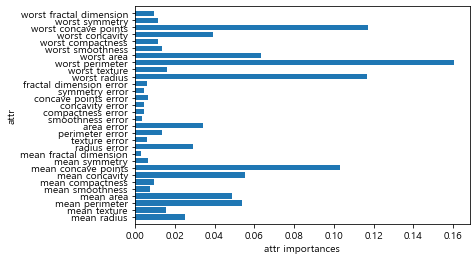

In [186]:
# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_cancer(forest)

이 그림에서 알 수 있듯이 랜덤 포레스트에서는 단일 트리의 경우보다 훨씬 많은 특성이 0 이상의 중요도를 가진다.

<장단점과 매개변수>

회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.

랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며, 데이터의 스케일을 맞출 필요도 없다.

기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 가지고 있다.

대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸릴 수 있지만 CPU코어가 많다면 손쉽게 병렬 처리할 수있다.
n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할  수 있다.
(n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.)

주의할점
랜덤 포레스트는 랜덤하기때문에 random_state를 다르제 지정하면 전혀 다른 모델이 만들어진다.
당연히 랜덤 포레스트의 트리가 많을수록 random_state값의 변화에 따른 변동이 적다.

랜덤 포레스트는 텍스트 데이터와 같이 매우 차원이 놓고 희소한 데이터에는 잘 작동하지 않는다.
이러한 데이터에는 선형 모델이 더 적합하다.
메모리를 많이 사용하기에 훈련과 예측이 느리다.

중요 매개변수는 n_estimators, max_features이고 max_depth 같은 사전 가지치기 옵션이 있다.
n_estimators는 클수록 좋다. 더 많은 트리를 평군하면 과대 적합을 줄여 안정적인 모델을 만둘 수 있다. (메모리와 훈련시간은 증가한다.)

max_features는 각 트리가 얼마나 무작위가 될지를 결정하며, 작은 max_features는 과대적합을 줄인다. 일반적으로는 기본값을 쓰면된다.

< 그래이던트 부스팅 회귀 트리 >

그래디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 기법이다.  
이름이 회귀지만 회귀/분류 모두 사용할 수 있다.  

랜덤 포레스트와 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.   
기본적으로 그래디언트 부스팅 회귀 트리에는 무작위성이 없다.  
대신 강력한 사전 가지치기가 사용된다.  

그래디언트 부스팅 트리는 머신러닝 경연 대회에서 우승을 많이 차지하였고, 업계에서도 널리 사용된다.  
랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 높은 정확도를 제공해준다.  

# 유방암 데이터셋을 이용한 그래디언트 부스팅 회귀 트리를 이용한 분류 성능 측정

In [188]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np

cancer = load_breast_cancer()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)
#기본값: 깊이3 트리100개 학습률0.1

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958


중요한 매개변수로는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 learning_rate이다.  
학습률이 크면 트리는 보정을 항하게 하기 때문에 복잡한 모델이 된다.  
n_estimators값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커진다.

In [190]:
# 훈련 세트의 정확도가 100%이므로 과대적합되었다.
# 과대적합을 막기위해 사전 가지치기를 한다.
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [192]:
print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [193]:
# 과대적합을 막기위해 학습률을 낮춘다
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [194]:
print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965


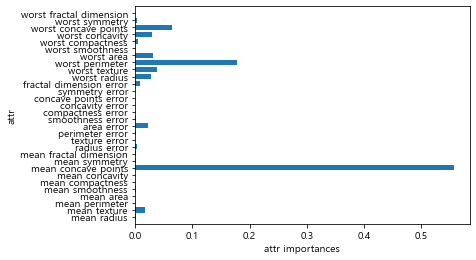

In [196]:
plot_feature_importances_cancer(gbrt)

In [199]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


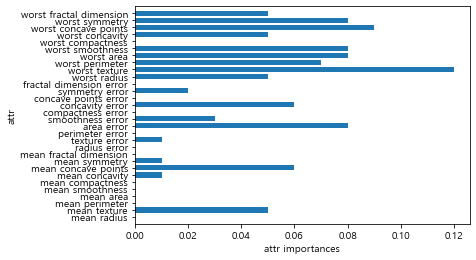

In [200]:
print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))
plot_feature_importances_cancer(gbrt)

그래디언트  부스팅 트리의 특성 중요도 그래프가 랜덤 포레스트 특성 중요도와 비슷하다.
다만 그래디언트 부스팅은 일부 특성을 완전 무시한다.

비슷한 종류의 데이터에서 그래디언트 부스팅은과 랜덤 포레스트 둘다 작동한다.
보통 더 안정적인 랜덤 포레스트를 먼저 적용한다.

대규모 머신러닝 문제에 그래디언트 부스팅을 적용하려면 xgboost패키지와 파이썬 인터페이스를 검토해봐야한다.


장단점
그래디언트 부스팅 결정 트리는 지도 학습에서 가장 강력하고 널리 사용하는 모델 중 하나이다.
단점은 매개변수 조정을 잘해야한다. 또한 훈련 시간이 길다. 트리기반 특성상 고차원 데이터에는 잘 작동하지 않는다.
장점으로는 특성의 스케일을 조정하지 않아도 되고, 연석적인 특성에서도 잘 동작한다.


매개변수
n_estimators가 클수록 모델이 복잡해지고 과대적합될 가능성이 높아진다.
learning_rate를 낮추면 비슷한 복잡도의 모델을 만들이 위해 더 많은 트리를 추가해야 한다.
따라서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는것이 좋다.

또 다른 매개변수로는 max_depth이다. 통상 5보다 깊어지지 않게 한다.

< 커널 서포트 벡터 머신 kernelized support vertor machines >  
커널 서포트 벡터 머신(SVM)은 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것이다.
서포트 벡터 머신을 분류와 회귀 모두 사용할 수 있다.

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


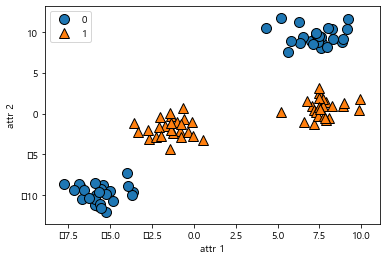

In [201]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs

# 데이터 셋 가져오기
X,y = make_blobs(centers=4,random_state=8)

# 4개의 클래스를 2개로 
y=y%2

# 2차원 데이터의 산점도 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)

plt.xlabel("attr 1")
plt.ylabel("attr 2")
plt.legend()
plt.show()

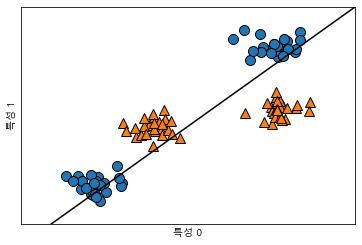

In [209]:
from sklearn.svm import LinearSVC

# 데이터 셋 가져오기

X,y = make_blobs(centers=4,random_state=8)
# 4개의 클래스를 2개로 
y=y%2

# Linaer SVC분류기로 훈련해보기
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [ ]:
< RBF커널을 사용한 SVM이 결정을 만드는 방법>
서포트 벡터 : 두 클래스 사이의 경계에 위치한 데이터 포인트 (쉽게 말해 경계에 있는 점)
새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정한다.
분류 결정은 서포트 벡터까지의 거리에 기반하며, 중요도는 훈련과정에서 학습한다. (dual_coef_속성)

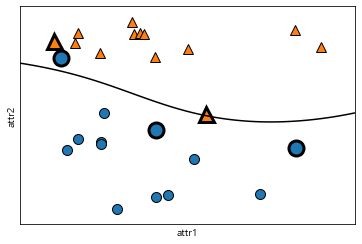

In [223]:
import mglearn
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 데이터 가져오기
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정된다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("attr1")
plt.ylabel("attr2")
plt.show()

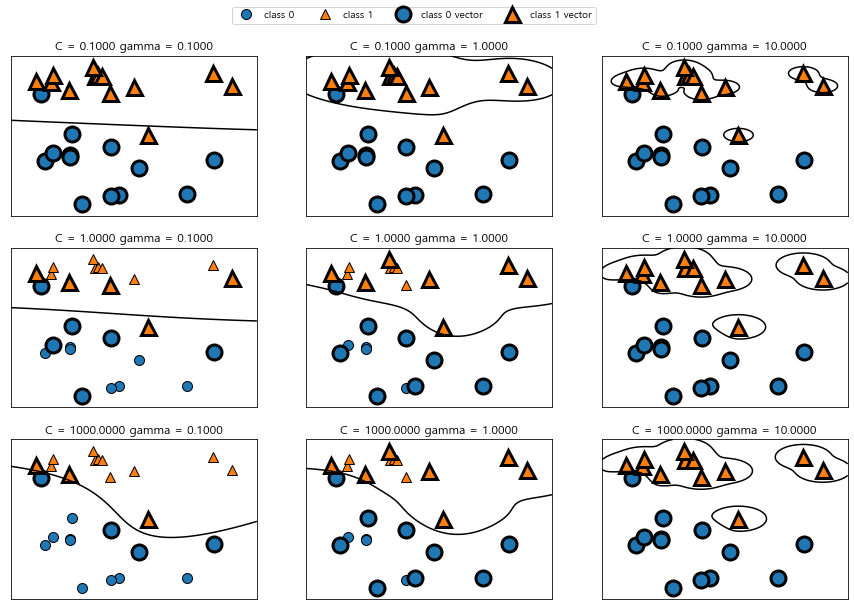

In [224]:
import mglearn
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 데이터 가져오기
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=.1).fit(X,y)

# subplot 3줄에 3개짜리 생성
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# 이웃의 갯수에 따른 최근접 이웃 모델의 경계
# 아래는 [1,3,9] 이므로 1개/3개/9개의 이웃일때 의 경계를 표시한다.
for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0,0].legend(["class 0","class 1","class 0 vector","class 1 vector"],ncol=4,loc=(.9,1.2))
plt.show()

작은 gamma값은 가우시안 커널의 반경을 크게하여 많은 포인드들이 가까이 있는것으로 고려한다. 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춘다.
gamma값이 커짐에 따라 결정 경계는 하나의 포인트에 더 민감해진다. 더 복잡한 모델을 만든다.
C의 값이 작을때는 제약이 큰 모델을 만들고 각 포인트의 영향력이 작다.
C값이 증가할수록 각 포인트 들이 모델에 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류한다.

< RBF커널 SVM을 유방암 데이터셋에 적용해보자. >

In [321]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)
svc=SVC()
svc.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.2f}".format(svc.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svc.score(X_test,y_test)))

훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.63


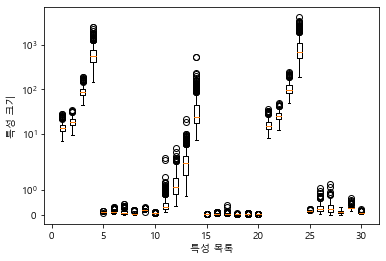

In [222]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 과대 적합됬음을 알 수 있다.
# SVM은 매개변수와 데이터 스케일에 매우 민감하다.
# 각 특성의 최대.최소값을 로그스케일로 표현해보자.
plt.boxplot(X_train,manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

In [ ]:
# 위 그래프를 보면 데이터셋의 특성의 자릿수가 완전히 다르다.
# SVM에서는 이러한 특성값들의 크기또한 영향이 크다. 
# 이러한 문제를 해결해보자.

In [ ]:
< SVM을 위한 데이터 전처리 >



SVM은 데이터의 크기에 민감하다 =>특성값의 범위가 비슷해지도록 조정을 해야한다.

커널 SVM에서는 모든 특성 값을 0와 1사이로 맞추는 방법을 많이 사용한다.



MinMaxScaler를 사용한다.

In [229]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


cancer = load_breast_cancer()
# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)
# 훈련 세트에서의 특성별 최소값 계산하기
min_on_training = X_train.min(axis=0)
# 특성별 (최대-최소) 범위 계산
range_on_traning = (X_train-min_on_training).max(axis=0)
# 훈련 데이터의 최솟값을 빼고 범위로 나누기
X_train_scaled = (X_train-min_on_training)/range_on_traning
print("스케일 조정 전 특성별 최솟값\n: {}" .format(X_train.min(axis=0)))
print("특성별 최솟값\n: {}" .format(X_train_scaled.min(axis=0)))
print("스케일 조정 전 특성별 최대값\n: {}" .format(X_train.max(axis=0)))
print("특성별 최대값\n: {}" .format(X_train_scaled.max(axis=0)))



스케일 조정 전 특성별 최솟값
: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
특성별 최솟값
: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 전 특성별 최대값
: [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
특성별 최대값
: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [237]:
# 훈련 세트에서의 특성별 최소값 계산하기
min_on_training = X_train.min(axis=0)

# 특성별 (최대-최소) 범위 계산
range_on_traning = (X_train-min_on_training).max(axis=0)

# 훈련 데이터의 최솟값을 빼고 범위로 나누기
X_train_scaled = (X_train-min_on_training)/range_on_traning

# 테스트 세트에서도 위의 범위를 이용하여 계산한다.
X_test_scaled = (X_test-min_on_training)/range_on_traning

In [235]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
print("훈련 세트 정확도 : {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도 : 0.948
테스트 세트 정확도 : 0.951


In [236]:
svc = SVC(C=1000)
svc.fit(X_train_scaled,y_train)
print("훈련 세트 정확도 : {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.972


C의 값을 증가시켰더니 모델의 성능이 향상되었다.

< 장단점 >
데이터의 특성이 몇개 안되더라도 복잡한 결정 경계를 만들 수 있다.
저/고 차원이 데이터에서 모두 잘 작동하지만, 샘플이 많은 경우는 잘 맞지않는다.
데이터 전처리와 매개변수 석정에 주의해야한다. => 랜덤포레스트나 그래디언트 부스팅을 사용하는 이유

< 매개변수 >
규제 매개변수 값인 C값이 클수록 모델 복잡도는 올라간다.
RBF커널은 가우시안 커널 폭의 역수인 gamma 매개변수를 더 가진다.
(SVM에는 RBF커널 말고도 다른 컬널이 많다.)

신경망이라고 알려진 알고리즘들은 최근 '딥러닝'으로 주목받고 있다.

복잡한 딥러닝 알고리즘의 출발점이며,
비교적 산단하게 분류,회귀에 사용할 수 있는 다층 퍼셉트론(Multi Layer Perceptrons)을 확인해보자.

< 신경망모델 >

MLP는 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습이라고 볼 수 있다.



선형 회귀 모델의 예측공식은 아래와 같았다.

y=w[0]*x[0]+w[1]*x[1]+w[2]*x[2]+....+w[p]*x[p]+b
특성x[0]~x[p]특성과 w[0]~w[p]까지 학습된 계수의 가중치의 합이다.

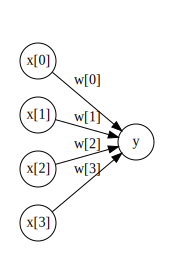

In [238]:
import mglearn

display(mglearn.plots.plot_logistic_regression_graph())

왼쪽 노드는 입력 특성을 나타내며, 연결선은 학습된 계수를 표현하고 오른쪽 노드는 입력의 가중치 합(출력)을 나타낸다.
MLP에서는 가중치 합을 만드는 과정이 여러번 반복되며, 중간단계를 구성하는 노드를 은닉 유닛, 중간단계를 은닉층이라한다.
아래 그림을 다시 봐보자.

[은닉층이 하나인 다층 퍼셉트론]

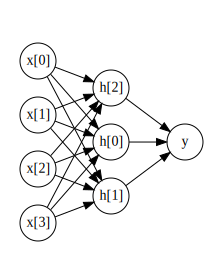

In [239]:
display(mglearn.plots.plot_single_hidden_layer_graph())

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


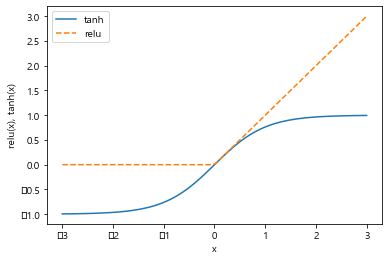

In [240]:
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line,np.maximum(line,0),linestyle="--",label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show()

<신경망 튜닝>
신경망 튜닝을 확인할 two_moons 데이터셋에 분류를 위한 다층 퍼셉트론 구현인 MLPClassifier를 적용해보자.

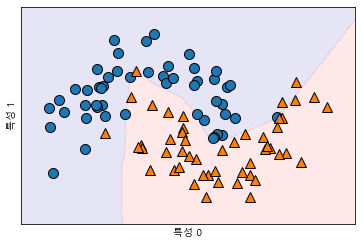

In [252]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.10)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

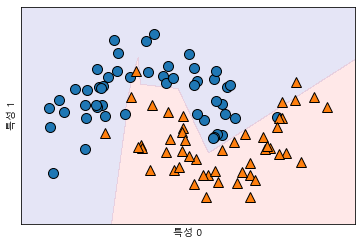

In [253]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.10)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

기본적으로 MPL에서는 비선형 함수에 렐루(relu)를 사용한다.

좀 더 결정 경계를 매끄럽게 하기위해서는 아래 같이 할수 있다.
<1. 은닉 유닛을 추가하기>
<2. 은닉 층을 추가하기>
<3. tanh 함수를 사용하기>
<4. 릿지 회귀와 선형 분류기 처럼 L2패널티를 사용하여 모델의 복잡도를 제어>
<5. alpha값에 따른 변화>

위에서 몇가지 확인해보자.

In [ ]:
<2. 은닉 층을 추가하기>
[10개의 유닛으로 된 두 개의 은닉층]

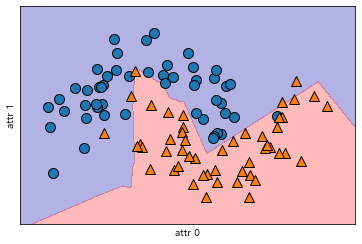

In [250]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [531]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test=train_test_split(train_pre,
                                               raw_data[["survived"]],
                                               test_size=0.1,
                                               random_state=13)

In [532]:
X_train=X_train.reset_index()
X_train=X_train.drop(["index"],axis=1)

X_test=X_test.reset_index()
X_test=X_test.drop(["index"],axis=1)

y_train=y_train.reset_index()
y_train=y_train.drop(["index"],axis=1)

y_test=y_test.reset_index()
y_test=y_test.drop(["index"],axis=1)

In [566]:
from sklearn.tree import  DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=13)
tree_clf.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.3f}".format(tree_clf.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree_clf.score(X_test,y_test)))

훈련 세트 정확도 : 0.788
테스트 세트 정확도 : 0.838


In [551]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50,max_leaf_nodes=10,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.823
테스트 세트 정확도 : 0.848


C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [564]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(n_estimators=50,random_state=0,max_depth=5,learning_rate=0.01)
gbrt.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 0.844
테스트 세트 정확도 : 0.857


C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [568]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.2f}".format(svc.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svc.score(X_test,y_test)))

훈련 세트 정확도 : 0.89
테스트 세트 정확도 : 0.73


C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [570]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test,y_test)))

훈련 세트 정확도 : 0.799
테스트 세트 정확도 : 0.829


C:\Users\A\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [573]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.784
테스트 세트 점수: 0.810


C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [539]:
from sklearn.ensemble import ExtraTreesClassifier
extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=200)
extra_clf.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(extra_clf.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(extra_clf.score(X_test, y_test)))


C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


훈련 세트 점수: 0.945
테스트 세트 점수: 0.800


In [540]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=1000, 
    algorithm="SAMME.R", learning_rate=1)
ada_clf.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(ada_clf.score(X_test, y_test)))

C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 점수: 0.857
테스트 세트 점수: 0.848


In [541]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=5, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 점수: 0.583
테스트 세트 점수: 0.498


C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
결과

In [581]:
model = [tree_clf,forest,gbrt,svc,mlp,logreg,extra_clf,ada_clf,gbrt]
key = ["DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier","SVC","MLPClassifier","LogisticRegression","ExtraTreesClassifier","AdaBoostClassifier","GradientBoostingRegressor"]

In [582]:
tmp = []
for i in model:
    tmp.append(i.score(X_test, y_test))
tmp

[0.8380952380952381,
 0.7904761904761904,
 0.8571428571428571,
 0.7333333333333333,
 0.8285714285714286,
 0.8095238095238095,
 0.8,
 0.8476190476190476,
 0.8571428571428571]

In [584]:
df = pd.DataFrame(data = tmp, index = key)

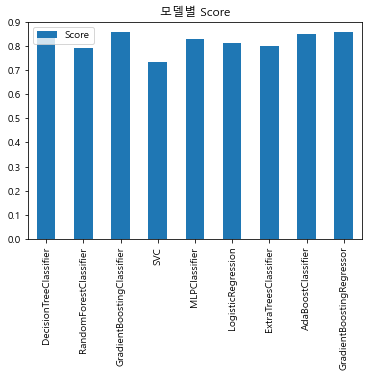

In [585]:
df.columns = ['Score']
df.plot.bar(title = '모델별 Score')